In [3]:
#importing library
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import r2_score

In [4]:
#loading the dataset
df=pd.read_csv('../input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')
df=df.head(5000)

In [5]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          3857 non-null   float64
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Postcode       5000 non-null   int64  
 9   Regionname     5000 non-null   object 
 10  Propertycount  5000 non-null   int64  
 11  Distance       5000 non-null   float64
 12  CouncilArea    5000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 507.9+ KB


# ##Preprocessing

In [6]:
#function to createt onehot_encoding
def onehot_encode(df,column_dict):
    df=df.copy()
    #using items function to looping through key and value pair
    for column,prefix in column_dict.items():
        #creating dummies column for each column
        dummies=pd.get_dummies(df[column],prefix=prefix)
        #concating dummies to original dataframe
        df=pd.concat([df,dummies],axis=1)
        #dropping the original column with drop function
        df=df.drop(column,axis=1)
    #returning the dataframe
    return df


In [7]:
#getting sequences
def get_sequences(texts):
    #saving the object to a variable
    tokenizer=Tokenizer()
    #using word_index method to get the number of words

    #training the variable
    tokenizer.fit_on_texts(texts)
    vocab_length=len(tokenizer.word_index)
    print('vocab length',vocab_length)
    #calling the sequences
    sequences=tokenizer.texts_to_sequences(texts)
    #finding the max seq length
    max_seq_length=np.max([len(sequences) for sequence in sequences])
    #using pad_sequences method to equalize all the list with the equal length
    sequences=pad_sequences(sequences,maxlen=max_seq_length,padding='post')
    return sequences
    

In [8]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping row with missing value in price column
    df=df.dropna(axis=0).reset_index(drop=True)
    #onehot_encode nomial features
    
    
    column_dict={'Suburb': 'SU',
     'Type': 'TY',
     'Method': 'ME',
     'SellerG': 'SE',
    'Postcode': 'PO',
     'Regionname': 'RE',
     'CouncilArea': 'CO',}
    #calling onehot_encode method
    df=onehot_encode(df,column_dict)
    #calling the get_sequence method and apply to address column
    addr_sequences=get_sequences(df['Address'])
    df=df.drop('Address',axis=1)
    
    
    #creating date function
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df['Date'].apply(lambda x:x.year)
    df['Month']=df['Date'].apply(lambda x:x.month)
    df['Day']=df['Date'].apply(lambda x:x.day)
    #dropping the origin Date column
    df=df.drop('Date',axis=1)
    #spliting the dataset
    y=df['Price'].copy()
    x=df.drop('Price',axis=1)
    #scaling the data
    scaler=StandardScaler()
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)
    return x,y,addr_sequences
    

In [9]:
x,y,addr_sequences=preprocess_inputs(df)

vocab length 3017


In [10]:
x

,Rooms,Propertycount,Distance,SU_Abbotsford,SU_Aberfeldie,SU_Airport West,SU_Albanvale,SU_Albert Park,SU_Albion,SU_Alphington,...,CO_Port Phillip City Council,CO_Stonnington City Council,CO_Whitehorse City Council,CO_Whittlesea City Council,CO_Wyndham City Council,CO_Yarra City Council,CO_Yarra Ranges Shire Council,Year,Month,Day
0,-0.086135,-0.800929,-1.281061,25.334430,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,6.225985,-0.055865,-0.444813,-1.352837,-0.945161
1,-0.086135,-0.800929,-1.281061,25.334430,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,6.225985,-0.055865,-0.444813,-1.352837,-0.945161
2,-0.086135,-0.800929,-1.281061,25.334430,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,6.225985,-0.055865,-0.444813,-1.352837,-0.945161
3,-0.086135,-1.354067,-0.671135,-0.039472,31.036269,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-0.444813,-1.352837,-0.945161
4,-1.154382,-0.924916,-0.278071,-0.039472,-0.032220,12.637576,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-0.444813,-1.352837,-0.945161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,-0.086135,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
3853,-0.086135,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
3854,-0.086135,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
3855,-2.222628,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224


In [11]:
addr_sequences

array([[  59,  519,    1, ...,    0,    0,    0],
       [1036,  238,    1, ...,    0,    0,    0],
       [1037,  184,    1, ...,    0,    0,    0],
       ...,
       [  13, 3017,    1, ...,    0,    0,    0],
       [  15,   87,  523, ...,    0,    0,    0],
       [   5,   13,  156, ...,    0,    0,    0]], dtype=int32)

In [15]:
#traintestsplit
x_train,x_test,addr_train,addr_test,y_train,y_test=train_test_split(x,addr_sequences,y,train_size=0.7)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(addr_train.shape)
print(addr_test.shape)
print(y_train.shape)
print(y_test.shape)

(2699, 762)
(1158, 762)
(2699, 3857)
(1158, 3857)
(2699,)
(1158,)


In [19]:
x_train.shape[1]

762

In [25]:
#setting up tensorflow neural network
x_inputs=tf.keras.Input(shape=(x_train.shape[1],),name='x_input')
addr_inputs=tf.keras.Input(shape=(addr_train.shape[1],))
#setting up dense layers
x_dense1=tf.keras.layers.Dense(512,activation='relu',name='x_dense1')(x_inputs)
x_dense2=tf.keras.layers.Dense(512,activation='relu',name='x_dense2')(x_dense1)
addr_embedding=tf.keras.layers.Embedding(
    input_dim=3017,
    output_dim=64,
    input_length=addr_train.shape[1],
    name='addr_embedding')(addr_inputs)
addr_flatten=tf.keras.layers.Flatten(name='addr_flatten')(addr_embedding)
#concatenating
concat=tf.keras.layers.concatenate([x_dense2,addr_flatten],name='concatenate')
outputs=tf.keras.layers.Dense(1,activation='linear')(concat)
model=tf.keras.Model(inputs=[x_inputs,addr_inputs],outputs=outputs)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_input (InputLayer)            [(None, 762)]        0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 3857)]       0                                            
__________________________________________________________________________________________________
x_dense1 (Dense)                (None, 512)          390656      x_input[0][0]                    
__________________________________________________________________________________________________
addr_embedding (Embedding)      (None, 3857, 64)     193088      input_7[0][0]                    
______________________________________________________________________________________________

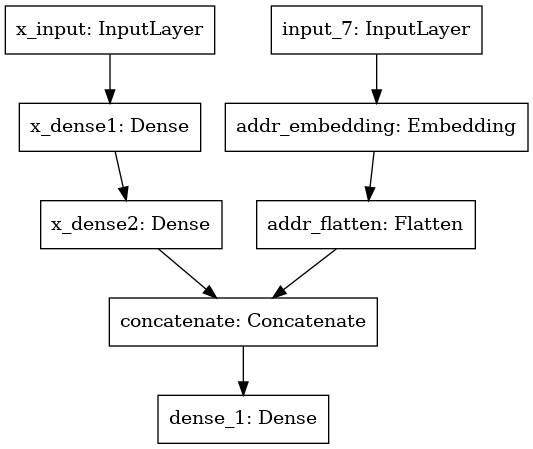

In [27]:
print(model.summary())
tf.keras.utils.plot_model(model)

In [28]:
#compilng the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mse')

history=model.fit(
    [x_train,addr_train],
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True),
              tf.keras.callbacks.ReduceLROnPlateau()]
    )
    

2022-04-27 01:19:45.175338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
68/68 [==============================] - 2s 12ms/step - loss: 436674985984.0000 - val_loss: 241538088960.0000
Epoch 2/50
68/68 [==============================] - 1s 10ms/step - loss: 174317191168.0000 - val_loss: 182705471488.0000
Epoch 3/50
68/68 [==============================] - 1s 11ms/step - loss: 155251359744.0000 - val_loss: 172282773504.0000
Epoch 4/50
68/68 [==============================] - 1s 11ms/step - loss: 132637204480.0000 - val_loss: 174357692416.0000
Epoch 5/50
68/68 [==============================] - 1s 13ms/step - loss: 114769862656.0000 - val_loss: 197516345344.0000
Epoch 6/50
68/68 [==============================] - 1s 10ms/step - loss: 120708620288.0000 - val_loss: 182688858112.0000


In [30]:
#result
y_true=np.array(y_test)
y_pred=np.squeeze(model.predict([x_test,addr_test]))


In [31]:
model_r2=r2_score(y_true,y_pred)
print('Model R2 Score{:2f}'.format(model_r2))

Model R2 Score0.624111


In [ ]:
#ordinal feature has some form of ordering 
#while nominal feature don't have any ordering.

In [ ]:
#getting information about unique value in each column
{column:len(x[column].unique()) for column in x.columns}

In [13]:
x,y,addr_sequences=preprocess_inputs(df)

vocab length 3017


In [14]:
x

,Rooms,Propertycount,Distance,SU_Abbotsford,SU_Aberfeldie,SU_Airport West,SU_Albanvale,SU_Albert Park,SU_Albion,SU_Alphington,...,CO_Port Phillip City Council,CO_Stonnington City Council,CO_Whitehorse City Council,CO_Whittlesea City Council,CO_Wyndham City Council,CO_Yarra City Council,CO_Yarra Ranges Shire Council,Year,Month,Day
0,-0.086135,-0.800929,-1.281061,25.334430,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,6.225985,-0.055865,-0.444813,-1.352837,-0.945161
1,-0.086135,-0.800929,-1.281061,25.334430,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,6.225985,-0.055865,-0.444813,-1.352837,-0.945161
2,-0.086135,-0.800929,-1.281061,25.334430,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,6.225985,-0.055865,-0.444813,-1.352837,-0.945161
3,-0.086135,-1.354067,-0.671135,-0.039472,31.036269,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-0.444813,-1.352837,-0.945161
4,-1.154382,-0.924916,-0.278071,-0.039472,-0.032220,12.637576,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,-0.184522,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-0.444813,-1.352837,-0.945161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,-0.086135,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
3853,-0.086135,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
3854,-0.086135,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
3855,-2.222628,-0.618411,-0.833782,-0.039472,-0.032220,-0.079129,-0.016104,-0.055865,-0.039472,-0.055865,...,-0.168105,5.419417,-0.167287,-0.201157,-0.174519,-0.160617,-0.055865,-1.973907,0.848805,2.497224
